In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [44]:
!scp hcm:/home/sebastian/work/boptx/examples/matsim/calibration_opdyts.p .

calibration_opdyts.p                          100%   15MB   1.4MB/s   00:10    


In [45]:
with open("calibration_opdyts.p", "rb") as f:
    data = pickle.load(f)

In [46]:
len(data["evaluations"])

174

In [47]:
for e in data["evaluations"]:
    info = e["information"]["opdyts"]
    
    print(
        info["type"],
        info["candidate"] if "candidate" in info else "-",
        e["transitional"], e["values"]
    )

initial - True [0.0, 0.0, 0.0]
candidate 0 True [ 0.17640523  0.1867558  -0.01032189]
candidate 1 True [ 0.04001572 -0.09772779  0.04105985]
candidate 2 True [0.0978738  0.09500884 0.01440436]
candidate 3 True [ 0.22408932 -0.01513572  0.14542735]
transition 2 True [0.0978738  0.09500884 0.01440436]
transition 3 True [ 0.22408932 -0.01513572  0.14542735]
transition 1 True [ 0.04001572 -0.09772779  0.04105985]
transition 0 True [ 0.17640523  0.1867558  -0.01032189]
transition 0 True [ 0.17640523  0.1867558  -0.01032189]
transition 2 True [0.0978738  0.09500884 0.01440436]
transition 1 True [ 0.04001572 -0.09772779  0.04105985]
transition 3 True [ 0.22408932 -0.01513572  0.14542735]
transition 2 True [0.0978738  0.09500884 0.01440436]
transition 0 True [ 0.17640523  0.1867558  -0.01032189]
transition 3 True [ 0.22408932 -0.01513572  0.14542735]
transition 1 True [ 0.04001572 -0.09772779  0.04105985]
transition 0 True [ 0.17640523  0.1867558  -0.01032189]
transition 2 True [0.0978738  0.0

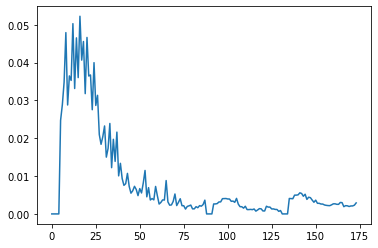

In [48]:
plt.plot([
    "equilibrium_gap" in e["information"]["opdyts"] and e["information"]["opdyts"]["equilibrium_gap"]
    for e in data["evaluations"]
])

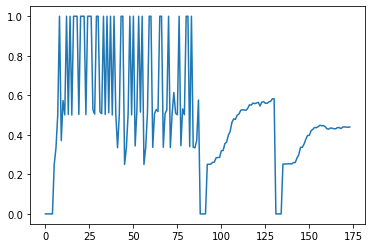

In [49]:
plt.plot([
    "uniformity_gap" in e["information"]["opdyts"] and e["information"]["opdyts"]["uniformity_gap"]
    for e in data["evaluations"]
])

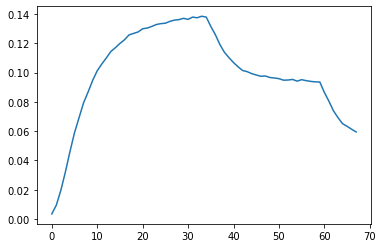

In [50]:
objectives = [
    e["objective"] for e in data["evaluations"]
    if "candidate" in e["information"]["opdyts"] and e["information"]["opdyts"]["candidate"] == 0
]

plt.plot(np.arange(len(objectives)), objectives)

In [51]:
for evaluation in data["evaluations"]:
    if not evaluation["transitional"]:
        print(evaluation["information"]["opdyts"].keys())
        print(evaluation["information"]["opdyts"]["candidate"])

dict_keys(['type', 'candidate', 'iteration', 'transient_performance', 'equilibrium_gap', 'uniformity_gap', 'restart', 'transition'])
0
dict_keys(['type', 'candidate', 'iteration', 'transient_performance', 'equilibrium_gap', 'uniformity_gap', 'restart', 'transition'])
0
dict_keys(['type', 'candidate', 'iteration', 'transient_performance', 'equilibrium_gap', 'uniformity_gap', 'restart', 'transition'])
1


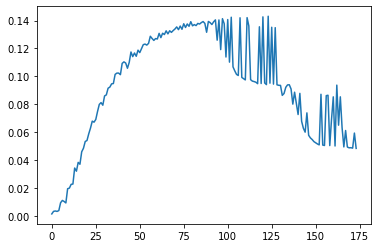

In [52]:
objectives = [
    evaluation["objective"] for evaluation in data["evaluations"]
]

plt.plot(objectives)

In [53]:
!scp hcm:/home/sebastian/work/boptx/examples/matsim/working_directory/220d9277677dcab75d059fedec77b3d3/output/boptx_termination.csv .

scp: /home/sebastian/work/boptx/examples/matsim/working_directory/220d9277677dcab75d059fedec77b3d3/output/boptx_termination.csv: No such file or directory


In [54]:
df = pd.read_csv("boptx_termination.csv", sep = ";")

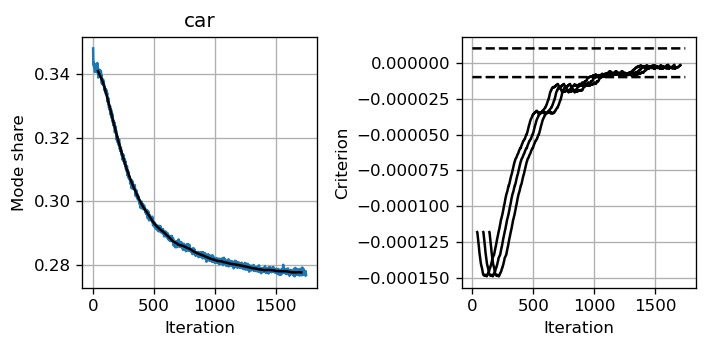

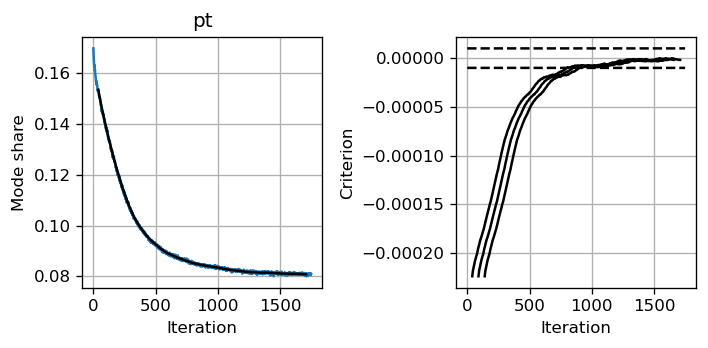

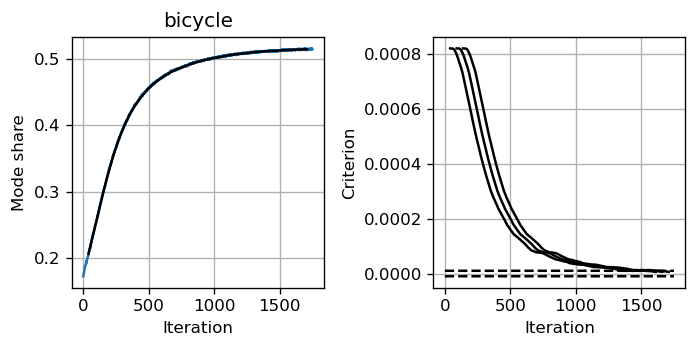

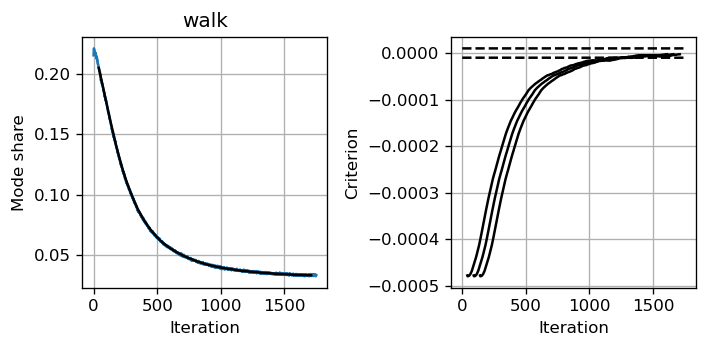

In [55]:
for mode in ["car", "pt", "bicycle", "walk"]:
    plt.figure(figsize = (6, 3), dpi = 120)

    plt.subplot(1, 2, 1)
    plt.plot(df["iteration"], df["{}_y".format(mode)], "C0")
    plt.plot(df["iteration"], df["{}_s".format(mode)], "k")
    plt.title(mode)
    plt.xlabel("Iteration")
    plt.ylabel("Mode share")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(df["iteration"], df["{}_dm".format(mode)], "k")
    plt.plot(df["iteration"], df["{}_d".format(mode)], "k")
    plt.plot(df["iteration"], df["{}_dp".format(mode)], "k")

    plt.plot(df["iteration"], df["T"], "k--")
    plt.plot(df["iteration"], -df["T"], "k--")
    plt.xlabel("Iteration")
    plt.ylabel("Criterion")
    plt.grid()

    plt.tight_layout()

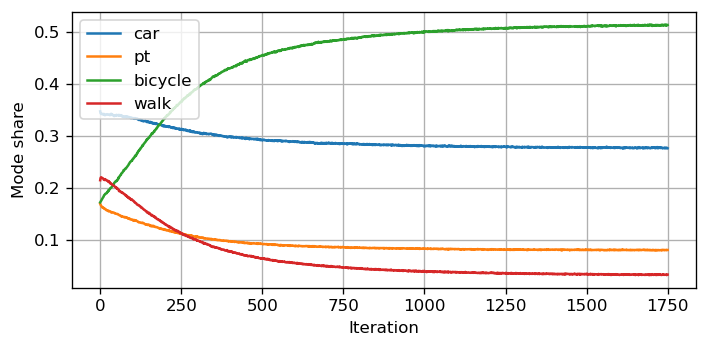

In [56]:
plt.figure(figsize = (6, 3), dpi = 120)

for mode in ["car", "pt", "bicycle", "walk"]:
    plt.plot(df["iteration"], df["{}_y".format(mode)], label = mode)
    
plt.xlabel("Iteration")
plt.ylabel("Mode share")
plt.grid()
plt.legend(loc = "best")

plt.tight_layout()